# Case Study: English To French Translation

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/translation.png?raw=true" width = "800" height = "400"/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-English-To-French-Translation" data-toc-modified-id="Case-Study:-English-To-French-Translation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: English To French Translation</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Review" data-toc-modified-id="Review-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Review</a></span></li><li><span><a href="#Import-Libraries-And-Datasets" data-toc-modified-id="Import-Libraries-And-Datasets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import Libraries And Datasets</a></span></li><li><span><a href="#Clean-The-Dataset" data-toc-modified-id="Clean-The-Dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clean The Dataset</a></span></li><li><span><a href="#Visualize-Clean-Dataset" data-toc-modified-id="Visualize-Clean-Dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualize Clean Dataset</a></span><ul class="toc-item"><li><span><a href="#English-Words-Dataset" data-toc-modified-id="English-Words-Dataset-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>English Words Dataset</a></span></li><li><span><a href="#French-Words-Dataset" data-toc-modified-id="French-Words-Dataset-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>French Words Dataset</a></span></li></ul></li><li><span><a href="#Tokenizaton-And-Padding" data-toc-modified-id="Tokenizaton-And-Padding-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Tokenizaton And Padding</a></span></li><li><span><a href="#Build-And-Train-The-Model" data-toc-modified-id="Build-And-Train-The-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Build And Train The Model</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Language translation is a key service that is needed by people who are traveling as well as for people who are settling in a new country. AI or machine learning-based neural machine has been used by Google Translate, which has been used by one billion users.In this project, a Long Short Term Memory Network (LSTM) will be train to perform English to French translation. This project could be practically used as a communication tool to help people by reducing the language barrier to one another.

**Problem:**
 - Build a sequence to sequence model that translates English sentence to French sentence.
 - Natural language processors work by converting words (or texts) to numbers.
 - And then these numbers are then used to train machine learning models to make prediction
 
**Dataset:**
 - English words and its corresponding French words translation
 
**Source:** 
 - This data is from the sentences file from tatoeba.org.

# Review

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french1.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french2.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french3.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french4.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french5.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french6.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french7.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french8.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french9.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french10.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french11.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french12.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french13.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french14.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french15.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/English-French-Translator/blob/master/french16.png?raw=true" width = "800" height = "400"/>

# Import Libraries And Datasets

In [1]:
# Import libraries
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [2]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'], engine = 'python')
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'], engine = 'python')

In [3]:
# Check english data
df_english.head()

english
0  new jersey is sometimes quiet during autumn , ...
1  the united states is usually chilly during jul...
2  california is usually quiet during march , and...
3  the united states is sometimes mild during jun...
4  your least liked fruit is the grape , but my l...

In [4]:
# Check english data info
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [5]:
# Check french data
df_french.head()

french
0  new jersey est parfois calme pendant l' automn...
1  les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...
2  california est gÃ©nÃ©ralement calme en mars , ...
3  les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...
4  votre moins aimÃ© fruit est le raisin , mais m...

In [6]:
# Check french data info
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [7]:
# Concatenate both English and French dataset
df = pd.concat([df_english, df_french], axis = 1)

In [8]:
# Check the dataset
df.head()

english  \
0  new jersey is sometimes quiet during autumn , ...   
1  the united states is usually chilly during jul...   
2  california is usually quiet during march , and...   
3  the united states is sometimes mild during jun...   
4  your least liked fruit is the grape , but my l...   

                                              french  
0  new jersey est parfois calme pendant l' automn...  
1  les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...  
2  california est gÃ©nÃ©ralement calme en mars , ...  
3  les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...  
4  votre moins aimÃ© fruit est le raisin , mais m...

In [9]:
# Show english records
print('Total English Records = {}'.format(len(df['english'])))

# Show french records
print('Total French Records = {}'.format(len(df['french'])))

Total English Records = 137860
Total French Records = 137860


# Clean The Dataset

In [10]:
# Download nltk packages
nltk.download('punkt')

# Download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joseff\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joseff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [12]:
# Apply function
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [13]:
# Create empty list
english_words = []
french_words  = []

In [14]:
# Create function that gets the unique values in datasets
def get_unique_words(x, word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)

# Apply the function
df['english'].apply(lambda x: get_unique_words(x, english_words));
df['french'].apply(lambda x: get_unique_words(x, french_words));

In [15]:
# Check unique words in english dataset
english_words[:10]

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'snowy']

In [16]:
# Check unique words in french dataset
french_words[:10]

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il']

In [17]:
# Check total unique words in english dataset
total_english_words = len(english_words)
total_english_words

199

In [18]:
# Check total unique words in french dataset
total_french_words = len(french_words)
total_french_words

350

# Visualize Clean Dataset

## English Words Dataset

In [19]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)

# Check data
words[:10]

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is']

In [20]:
# Obtain the total count of words
english_words_counts = Counter(words)

# Check data
english_words_counts;

# Output:
# Counter({'new': 12197,
#          'jersey': 11225,
#          'is': 205858,
#          'sometimes': 37746,
#          'quiet': 8693,
#          'during': 74933,
#          'autumn': 9004,
#          'and': 59850,
#          'it': 75137,
#          'snowy': 8898,

In [21]:
# Sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

# Check data counts
english_words_counts;

# Output:
# [('is', 205858),
#  ('in', 75525),
#  ('it', 75137),
#  ('during', 74933),
#  ('the', 67628),
#  ('but', 63987),
#  ('and', 59850),
#  ('sometimes', 37746),
#  ('usually', 37507),
#  ('never', 37500),
#  ('favorite', 28332),
#  ('least', 27564),
#  ('fruit', 27192),
#  ('most', 14934),
#  ('loved', 14166),

In [22]:
# Append the values to a list for visualization purposes
# Create empty
english_words = []
english_counts = []

# Separate english words and its counts
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [23]:
# Check data
english_words[:10]

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never']

In [24]:
# Check data
english_counts[:10]

[205858, 75525, 75137, 74933, 67628, 63987, 59850, 37746, 37507, 37500]

In [25]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

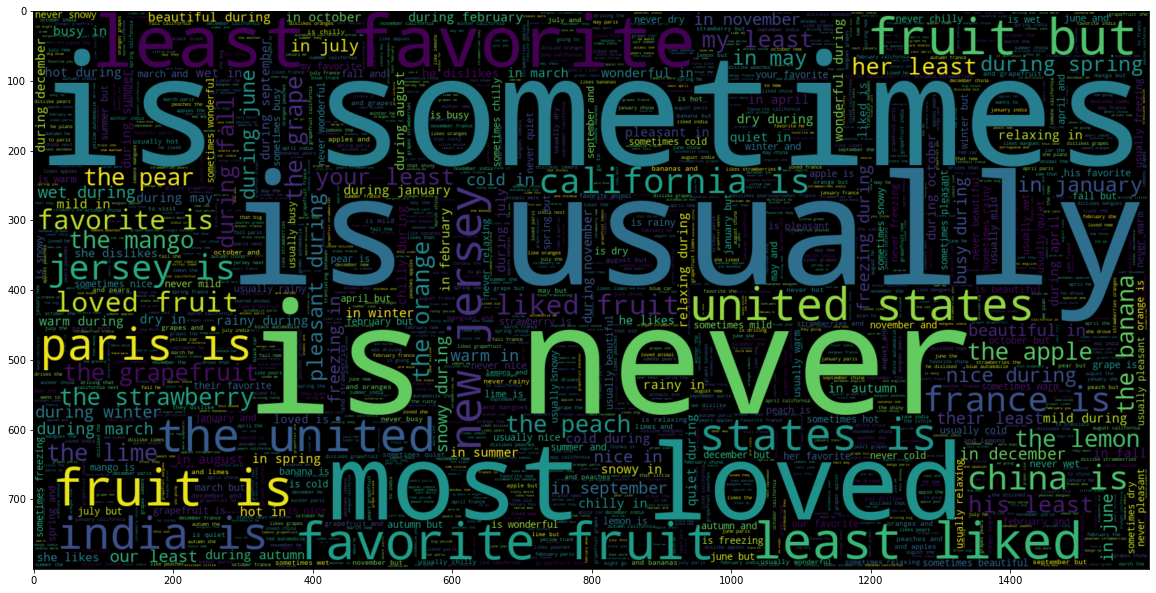

In [26]:
# Plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [27]:
# Check sample data
df.english[0]

'new jersey is sometimes quiet during autumn  and it is snowy in april '

In [28]:
# Tokenized sample data
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [29]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


## French Words Dataset

In [30]:
# Create empty list
words = []

# Obtain the count of french words
for i in df['french']:
  for word in i.split():
    words.append(word)
words

# Obtain the total count of words
french_words_counts = Counter(words)

# Check data
french_words_counts;

# Output:
# Counter({'new': 11047,
#          'jersey': 11052,
#          'est': 196809,
#          'parfois': 37746,
#          'calme': 7256,
#          'pendant': 10741,
#          "l'": 32917,
#          'automne': 14727,
#          'et': 59851,
#          'il': 84079,
#          'neigeux': 1867,
#          'en': 105768,
#          'avril': 8954,
#          'les': 65255,

In [31]:
# Sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

# Check data
french_words_counts;

# Output:
# [('est', 196809),
#  ('en', 105768),
#  ('il', 84079),
#  ('les', 65255),
#  ('mais', 63987),
#  ('et', 59851),
#  ('la', 49861),
#  ('parfois', 37746),
#  ('jamais', 37215),
#  ('le', 35306),
#  ("l'", 32917),

In [32]:
# Append the values to a list for visuaization purpose
# Create empty list
french_words = []
french_counts = []

# Separate english words and its counts
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

# Plot barplot using plotly 
fig = px.bar(x = french_words, y = french_counts)
fig.show()

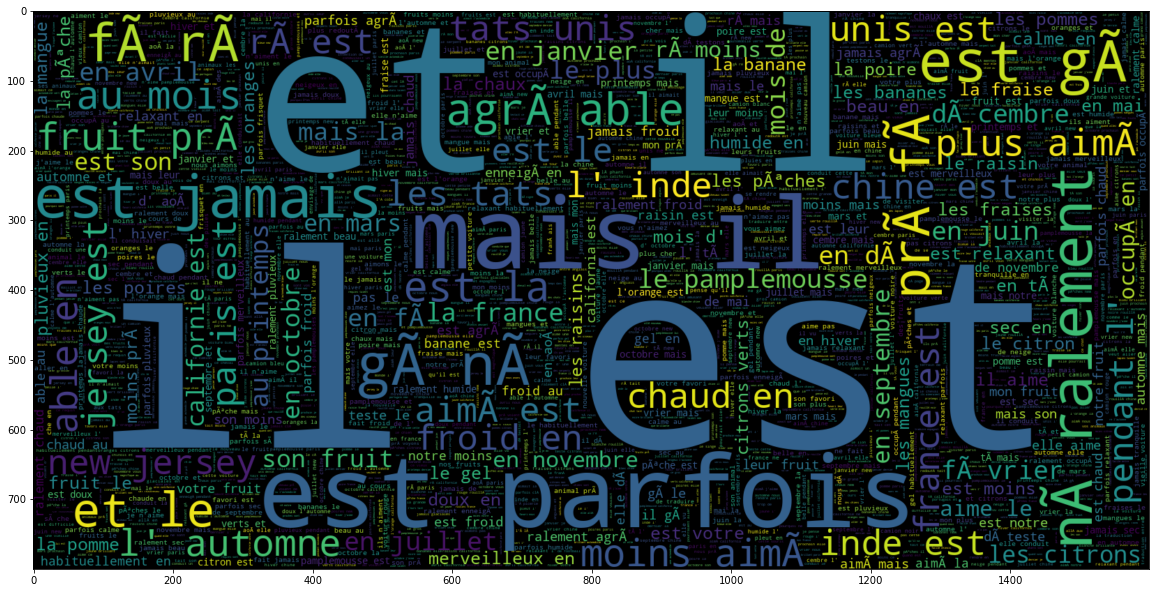

In [33]:
# Plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [34]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  24


# Tokenizaton And Padding

In [35]:
# Create function
def tokenize_and_pad(x, maxlen):
    
  # A tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [36]:
# Tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [37]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [38]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [39]:
# Show tokenized english words
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0  0]]


In [40]:
# Show tokenized french words
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit prÃ©fÃ©rÃ©  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [41]:
# Function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [42]:
# Check texts
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril          "

In [43]:
# Import library
from sklearn.model_selection import train_test_split

# Train test split
x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

# Build And Train The Model

In [44]:
# Sequential Model
model = Sequential()

# Embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))

# Encoder
model.add(LSTM(256))

# Decoder
# Repeat vector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))

# LSTM layer
model.add(LSTM(256, return_sequences = True ))

# Dense layer, time distributed
model.add(TimeDistributed(Dense(french_vocab_size, activation = 'softmax')))

# Compile the model
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 24, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)

# Check data dimension
y_train.shape

(124074, 24, 1)

In [48]:
# Train the model
model.fit(x_train, y_train, batch_size = 1024, validation_split = 0.1, epochs = 3)

Epoch 1/3
110/110 [==============================] - 1189s 11s/step - loss: 2.2790 - accuracy: 0.5345 - val_loss: 1.9813 - val_accuracy: 0.5592
Epoch 2/3
110/110 [==============================] - 1298s 12s/step - loss: 1.7862 - accuracy: 0.5948 - val_loss: 1.5561 - val_accuracy: 0.6192
Epoch 3/3
110/110 [==============================] - 1280s 12s/step - loss: 1.4584 - accuracy: 0.6298 - val_loss: 1.3620 - val_accuracy: 0.6449


In [49]:
# Save the model
model.save("weights.h5")

# Model Evaluation

In [50]:
# Function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [53]:
# Show the original English and French words, and then the predicted french word
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - the united states is freezing during august and it is mild in april           

Original French word - les ã©tats unis est le gel au mois d' aoã»t et il est doux en avril        

Predicted French word - new ã©tats est est parfois en en et et il il est est en          




Original English word - china is usually relaxing during july but it is never beautiful in april           

Original French word - chine est relaxant habituellement en juillet mais il est jamais beau en avril           

Predicted French word - la est est en en en mais mais est est en en            




Original English word - he saw the shiny white car                  

Original French word - il a vu la voiture blanche brillante                 

Predicted French word - elle aime cette voiture voiture voiture                  




Original English word - we like apples grapes and bananas                  

Original French word - nous aimons les pommes les raisins et les bananes             

# Conclusion

The model performed poorly due to its low number iterations in the training but there were some words predicted correctly. This could be further improve by increasing the number of epochs, experimenting the hyper parameters and adding more data into the model.